# Introduction to Data Science for Platypus Camp
## Day 1
### hello

### Jupyter Notebook Environment

There are two kinds of cells in the notebook: the Code Cell or Markdown Cell.  
The Code cell contains has the code you can execute, while Markdown cell is for you to write text, such as this cell

we will show you how to write your own notebook on day 4.  
For now, let's focus how to run the notebook using the existing code (in somecases, needs bit of "tinkering" from you)

1. enter "Edit mode": Select a cell (using mouse or up/down arrow key)  and hit ENTER  
2. run current cell and move to the next cell: SHIFT + ENTER

Now select this cell, hit ENTER and then SHIFT+ENTER


### Import necessary packages

In [3]:
get_ipython().magic('matplotlib inline')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds4hs.plot_funcs 
import platypus.io.logs


### Load log file and get sensor information from the log file

In [5]:

# Import the data from the specified logfile
log_filename = 'airboat_20160426_024734.txt'
data = platypus.io.logs.load_v4_1_0(log_filename)

# Print the available sensors and channels for this logfile.
print("Available sensors/channels:")
for s in data.keys():
    if s == 'pose' or s == 'BATTERY':
        continue
    for c in data[s].columns.values:
        print("  {:s}, {:s}".format(s, c))



Available sensors/channels:
  ES2, ec
  ES2, temp
  ATLAS_DO, do
  ATLAS_PH, ph


### Extract data from each sensor and  store in a data frame

In [6]:
ES2 = ds4hs.plot_funcs.get_data(data, 'ES2')
DO = ds4hs.plot_funcs.get_data(data, 'ATLAS_DO')
PH = ds4hs.plot_funcs.get_data(data, 'ATLAS_PH')

In [9]:
ES2.head(2) # take a peak of the data
#ES2.shape

,ec,temp,latitude,longitude
time,,,,
1970-01-01 00:22:01.328,247,19.1,40.343605,-76.911429
1970-01-01 00:22:02.826,253,19.1,40.343602,-76.911432


### Plot 3D trail plot
*parameter list (sensor_dataframe_name, measurement name, sensor_name)*  
*be patient!!! it might take sometime to render the plot*

/Users/lujiec/anaconda/envs/platypus/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


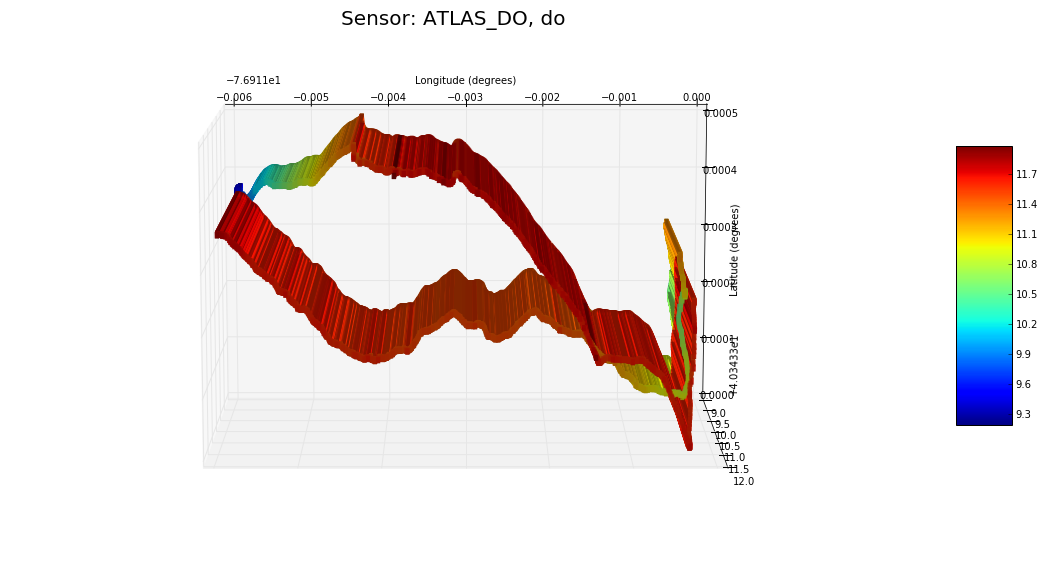

In [20]:
#ds4hs.plot_funcs.plot_3D_trail(ES2, 'ec', 'ES2') #EC 
#ds4hs.plot_funcs.plot_3D_trail(ES2, 'temp', 'ES2') #temperature, also from ES2 sensor
#ds4hs.plot_funcs.plot_3D_trail(PH, 'ph', 'ATLAS_PH') #PH
ds4hs.plot_funcs.plot_3D_trail(DO, 'do', 'ATLAS_DO') #Disolved Oxygen (DO)



### 2D surface plot

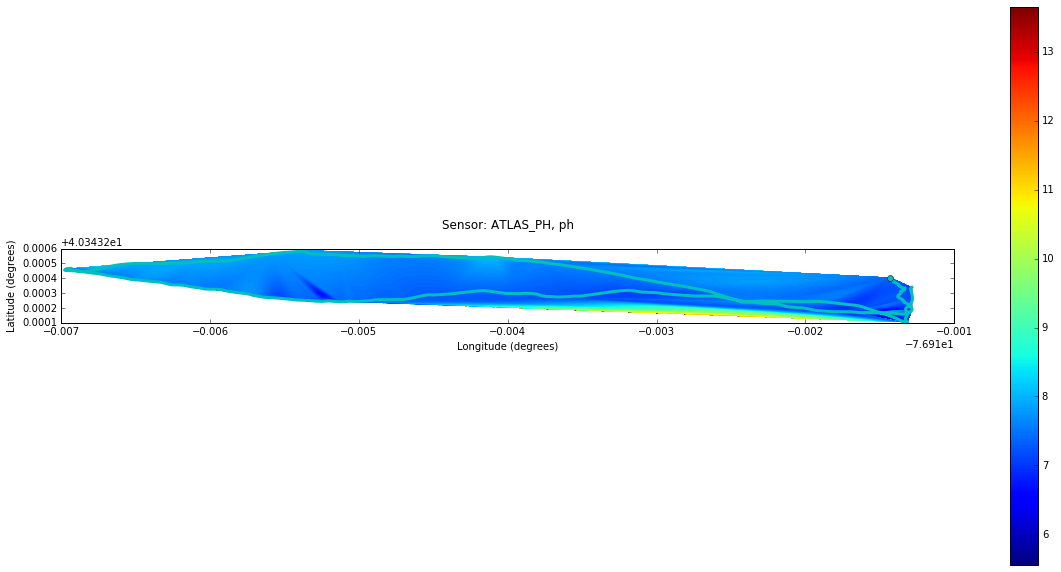

In [11]:
#ds4hs.plot_funcs.plot_2D_surface(ES2, 'ec', 'ES2') #EC 
#ds4hs.plot_funcs.plot_2D_surface(ES2, 'temp', 'ES2') #temperature, also from ES2 sensor
ds4hs.plot_funcs.plot_2D_surface(PH, 'ph', 'ATLAS_PH') #PH
#ds4hs.plot_funcs.plot_2D_surface(DO, 'do', 'ATLAS_DO') #Disolved Oxygen (DO)


### Python basics on pandas data frame
Please take some time to experiment in the cell below, to execute the cell,  hit CTRL-Enter

In [12]:
#python basics (pandas data frame)

#shape 
ES2.shape 
ES2.head(3) # top three rows
ES2.tail(4)

df = ES2[['temp','ec']]  #select a column

df.index
df.columns
df.values

df.describe()
df.mean()
df.min()
df.max()

#selection by label
df['temp'] # column
df[0:6] # row

#selection by location
df.iloc[0:4] # first 4 rows
df.iloc[0:4, 0:2] # first 4 rows and first two columns



,temp,ec
time,,
1970-01-01 00:22:01.328,19.1,247
1970-01-01 00:22:02.826,19.1,253
1970-01-01 00:22:04.327,19.1,252
1970-01-01 00:22:05.830,19.1,247


In [13]:
df.max()

temp     20.9
ec      281.0
dtype: float64

### Let's plot EC data, what do you notice?

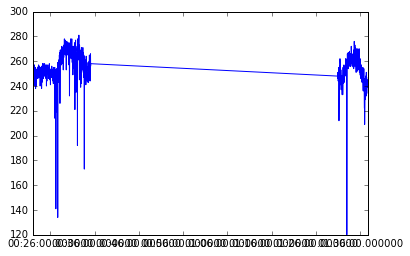

In [14]:
plt.plot(df['ec'])


### Let us break the data into two chunks
*you will notice some warning message after executing the code, this is okay*

/Users/lujiec/anaconda/envs/platypus/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/lujiec/anaconda/envs/platypus/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


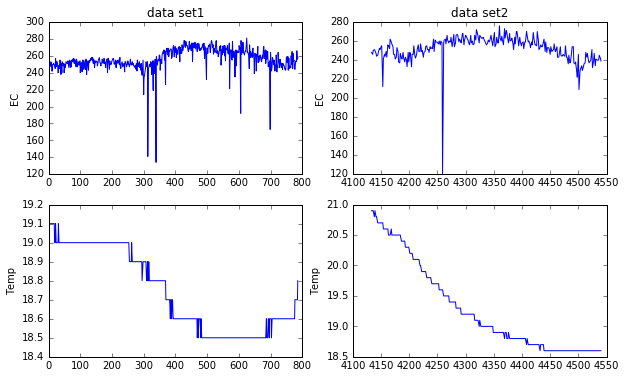

In [15]:
df = ES2[['temp','ec']]  #select a column

tmp = df.index - df.index[0]  # offset releative to the first timestamp
df.loc[:, 'timestamp'] = pd.Series(tmp.astype('timedelta64[s]').astype(float), index=df.index) 
#convert the offset from timedelta type to float type and store it as a new column named "timestamp"

df2 = df.copy() # create copy of the original data frame
df2.index = df['timestamp'] # set the data frame index to be timestamp

#extract ec data
ec1 = df2.loc[df2.index<2000, 'ec']
ec2 = df2.loc[df2.index>2000, 'ec']
# extract temperature data
temp1 = df2.loc[df2.index<2000,'temp']
temp2 = df2.loc[df2.index>2000,'temp']

#plot as it is
fig = plt.figure(figsize=(10, 6), dpi=100)
plt.subplot(2,2,1); 
plt.plot(ec1); plt.ylabel('EC'); plt.title('data set1')
plt.subplot(2,2,2); 
plt.plot(ec2); plt.ylabel('EC'); plt.title('data set2')
plt.subplot(2,2,3); 
plt.plot(temp1);  plt.ylabel('Temp'); 
plt.subplot(2,2,4);
plt.plot(temp2);  plt.ylabel('Temp')

### Identify and clean outlier by visual inspection

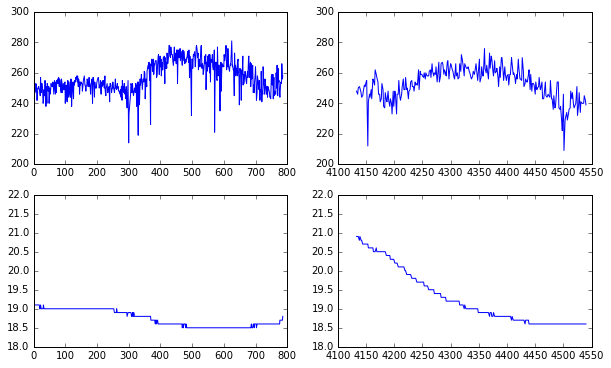

In [16]:

ec2[ec2<200] =np.nan # replace with NA
ec1[ec1<200] =np.nan

# fill missing value by interpolation
ec1 = ec1.interpolate()
ec2 = ec2.interpolate()

##% plot after fixing outlier issues and y-asix range issue 
fig = plt.figure(figsize=(10, 6), dpi=100)
plt.subplot(2,2,1); plt.ylim(200, 300)
plt.plot(ec1)
plt.subplot(2,2,2); plt.ylim(200, 300)
plt.plot(ec2)
plt.subplot(2,2,3); plt.ylim(18, 22)
plt.plot(temp1)
plt.subplot(2,2,4); plt.ylim(18, 22)
plt.plot(temp2)


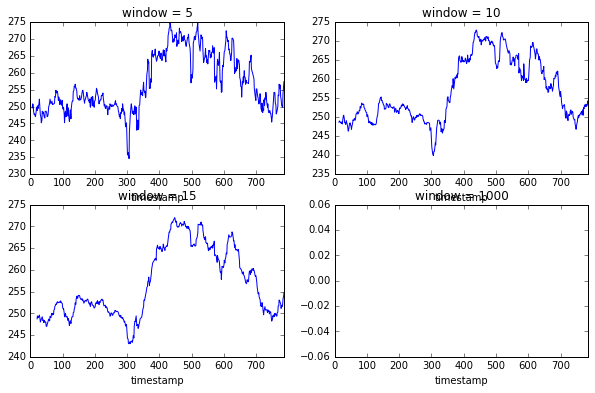

In [20]:
#%% smoothing with moving average
winsize_list = [5,10,15,1000]
fig = plt.figure(figsize=(10,6), dpi=100)
for ii  in range(4):
    plt.subplot(2,2,ii+1);plt.title('window = %s' %(winsize_list[ii]))
    r = ec1.rolling(window=winsize_list[ii])
    r.mean().plot()
